# KNN基础

In [8]:
import numpy as np
import matplotlib.pyplot as plt
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]#肿瘤的大小和时间
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]#是否为恶性肿瘤

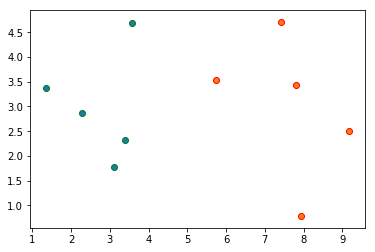

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)#构建训练集
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],edgecolors='g')#良性肿瘤的大小为x轴，时间为Y轴，颜色为绿
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],edgecolors='r')#恶性肿瘤的大小为x轴，时间为Y轴，颜色为红
plt.show()

In [6]:
x = np.array([8.093607318, 3.365731514])#等待判断的肿瘤

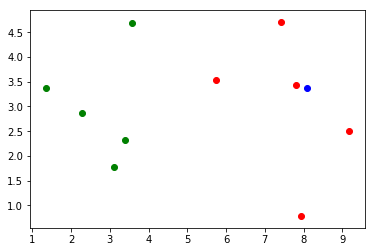

In [7]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')#把待判断肿瘤画到图中，颜色为蓝
plt.show()

# KNN的过程

In [9]:
from math import sqrt
distances=[]#存放各个点到x的距离的数组
for x_train in X_train:
    d= sqrt(np.sum((x_train-x)**2))#每个点的大小和时间减去x的大小和时间
    distances.append(d)

In [10]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [11]:
distances=[sqrt(np.sum((x_train-x)**2)) for x_train in X_train]#以上句子可简化为这一句

In [12]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [13]:
neareat = np.argsort(distances)#按距离从小到大的距离返回索引

In [14]:
k = 6#取距离最近的6个点
topK_y = [y_train[neighbor] for neighbor in neareat[:k]]#距离最近的6个点肿瘤的良恶情况

In [15]:
topK_y

[1, 1, 1, 1, 1, 0]

In [16]:
from collections import Counter
votes = Counter(topK_y)#Counter({0: 1, 1: 5})可看出有1个良性，5个恶性

In [19]:
votes.most_common(1)

[(1, 5)]

In [21]:
predict_y = votes.most_common(1)[0][0]#找出最多的1种情况 [(1, 5)] 取其良恶情况

In [22]:
predict_y

1